# Необходимые библиотеки

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Задача 6.1

In [ ]:
# Заданные координаты точек
coordinates = [(-0.5, 0.72), (-0.25, 1.271), (0, 1.2), (0.25, 0.7363), (0.5, 0.24),
               (0.75, -0.175), (1, -0.36), (1.25, -0.328), (1.5, 0), (1.75, 0.3538),
               (2, 0.72), (2.25, 0.6969), (2.5, 0), (2.75, -1.792), (3, -5.16)]

# Разделяем координаты x и y
x_coordinates = [coord[0] for coord in coordinates]
y_coordinates = [coord[1] for coord in coordinates]

# Преобразуем их в numpy массивы
x = np.array(x_coordinates)
y = np.array(y_coordinates)

print("Вектор x:", x)
print("Вектор y:", y)

Вектор x: [-0.5  -0.25  0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25
  2.5   2.75  3.  ]
Вектор y: [ 0.72    1.271   1.2     0.7363  0.24   -0.175  -0.36   -0.328   0.
  0.3538  0.72    0.6969  0.     -1.792  -5.16  ]


In [ ]:
def mnk(x, y):
    results = []  # Список для хранения результатов

    for m in range(len(x)):  # Перебираем все степени многочлена от 0 до количества точек
        poly_coeffs = np.polyfit(x, y, m)  # Вычисляем коэффициенты многочлена МНК
        poly = np.poly1d(poly_coeffs)  # Создаем многочлен на основе коэффициентов

        # Вычисляем значения многочлена на заданных точках x
        y_pred = poly(x)

        # Вычисляем среднеквадратичное отклонение (sigma)
        sigma_m = np.sqrt(np.mean((y - y_pred) ** 2))

        # Добавляем результаты в список
        results.append((m, poly, sigma_m))

    return results

# Находим многочлены и значения sigma для каждой степени многочлена
results = mnk(x, y)

# Выводим результаты
print("┌─────────────────────┬───────────────────|")
print("│ Степень многочлена  │        Сигма      │")
print("├─────────────────────┼───────────────────|")
for m, poly, sigma_m in results:
    print(f"│ {m:^19} │ {sigma_m:^17.10f} │")
print("└─────────────────────┴───────────────────|")


┌─────────────────────┬───────────────────|
│ Степень многочлена  │        Сигма      │
├─────────────────────┼───────────────────|
│          0          │   1.5312874860    │
│          1          │   1.1851983447    │
│          2          │   1.0444506569    │
│          3          │   0.7046452022    │
│          4          │   0.0143862427    │
│          5          │   0.0131679439    │
│          6          │   0.0126791077    │
│          7          │   0.0125599128    │
│          8          │   0.0124217401    │
│          9          │   0.0118135664    │
│         10          │   0.0115678188    │
│         11          │   0.0107141283    │
│         12          │   0.0104999064    │
│         13          │   0.0097016732    │
│         14          │   0.0000000119    │
└─────────────────────┴───────────────────|


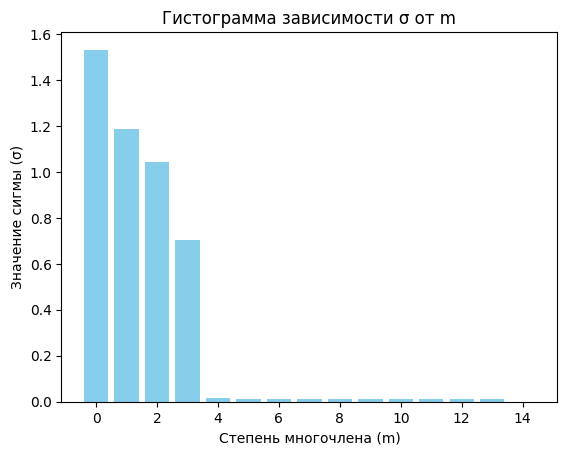

In [ ]:
# Строим гистограмму зависимости sigma от m
sigmas = [sigma_m for _, _, sigma_m in results]
plt.bar(range(len(sigmas)), sigmas, color='skyblue')
plt.xlabel('Степень многочлена (m)')
plt.ylabel('Значение сигмы (σ)')
plt.title('Гистограмма зависимости σ от m')
plt.show()

**Вывод:** при степени многочлена m = 4, достигается отклочение = 0.0143862427, при повышении степени разница в приближении становится намного меньше, так при m = 5, ср. отклонение = 0.0131679439. С другой стороны, при максимальной степени многочлена, равной кол-ву заданных точек, то есть = 14, значение среднего отклонения (0.0000000119) на 6 порядков меньше, чем при m = 4. За оптимальную степень возьмём 4-ую, так как слишком высокий порядок многочлена нужно взять для МНК для более точного описания графика через заданные точки

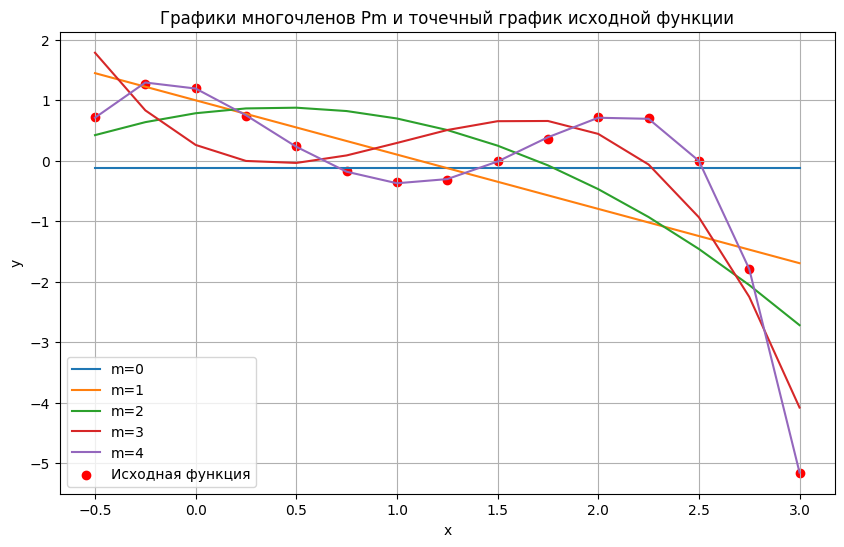

In [ ]:
def mnk(x, y, max_degree):
    polynomials = []

    for m in range(max_degree + 1):
        poly_coeffs = np.polyfit(x, y, m)
        poly = np.poly1d(poly_coeffs)
        polynomials.append(poly)

    return polynomials


# Вычисляем многочлены для всех степеней от 0 до m*
max_degree = 4  # Примерное значение m*
polynomials = mnk(x, y, max_degree)

# Строим графики многочленов
plt.figure(figsize=(10, 6))
for m, poly in enumerate(polynomials):
    plt.plot(x, poly(x), label=f'm={m}')

# Точечный график исходной функции
plt.scatter(x, y, color='red', label='Исходная функция')

# Добавляем подписи к осям и заголовок
plt.xlabel('x')
plt.ylabel('y')
plt.title('Графики многочленов Pm и точечный график исходной функции')

# Добавляем легенду
plt.legend()

# Показываем график
plt.grid(True)
plt.show()

# Задача 6.5

In [ ]:
# Координаты

# Вычисление значений x_data по формуле xk = -1 + 0.1 * k
x_data = np.array([-1 + 0.1 * k for k in range(21)])

# Заданные данные y
y_data = np.array([-0.3156, -1.193, -0.6763, 0.6968, 1.2, 0.2828, -0.7221, -0.4711, 0.5024, 0.7083,
                   -0.3085, -1.204, -0.6968, 0.67, 1.2049, 0.3095, -0.7008, -0.5057, 0.497, 0.7244, -0.3])

# Определение базисных функций
def f1(x):
    return np.sin(4 * np.pi * x)

def f2(x):
    return np.cos(2 * np.pi * x)

# Создание матрицы коэффициентов A и вектора значений y
A = np.column_stack((f1(x_data), f2(x_data)))
y = y_data

# Решение системы уравнений МНК
c1, c2 = np.linalg.lstsq(A, y, rcond=None)[0]

print("Оптимальное значение параметра c1:", c1)
print("Оптимальное значение параметра c2:", c2)

Оптимальное значение параметра c1: -1.0054769301866677
Оптимальное значение параметра c2: -0.3024532777051007


# Задача 6.7.2

In [28]:
# Шаг 0: заполним начальные условия

# Определяем функцию
def f(x):
    return np.abs(x + x**2)

# Начальные условия
a = -2
b = 2
k = 4 # кол-во точек на отрезке [-2,2]

# Шаг 1: Возьмём k точек и найдём значение функции в них

# Вычисляем равномерно распределенные точки на отрезке [a, b]
x_values = np.linspace(a, b, k)

# Вычисляем значения функции в этих точках
y_values = f(x_values)

# Выводим значения функции
for i, (x, y) in enumerate(zip(x_values, y_values)):
    print(f"Точка {i}: x = {x}, y = {y}")

Точка 0: x = -2.0, y = 2.0
Точка 1: x = -0.6666666666666667, y = 0.2222222222222222
Точка 2: x = 0.6666666666666665, y = 1.1111111111111107
Точка 3: x = 2.0, y = 6.0


In [29]:
# Шаг 2: напишем функцию, которая вычисляет значение интерполяционного многочлена 1-ой степени по точкам
def linear_interpolation(x_i, y_i, x_ip1, y_ip1, x):
    """
    Вычисляет значение интерполяционного многочлена первой степени
    для заданных точек и произвольной точки на отрезке [x_i, x_ip1].

    Аргументы:
    x_i, y_i: Координаты первой точки.
    x_ip1, y_ip1: Координаты второй точки.
    x: Произвольная точка на отрезке [x_i, x_ip1].

    Возвращает:
    Значение интерполяционного многочлена первой степени в точке x.
    """
    # Используем формулу линейной интерполяции
    return y_i + (y_ip1 - y_i) / (x_ip1 - x_i) * (x - x_i)


In [30]:
# Пример применения - ТЕСТ:
x_i = x_values[0]  # первая точка на отрезке
y_i = y_values[0]
x_ip1 = x_values[1]  # вторая точка на отрезке
y_ip1 = y_values[1]
x_arbitrary = 0.5  # произвольная точка на отрезке

# Вычисляем значение интерполяционного многочлена первой степени
result = linear_interpolation(x_i, y_i, x_ip1, y_ip1, x_arbitrary)
print("Значение интерполяционного многочлена первой степени в произвольной точке:", result)

Значение интерполяционного многочлена первой степени в произвольной точке: -1.333333333333333


In [31]:
# Теперь с её помощью вычислим приближённые значения f(x) при кусочно-линейной интерполяции в 3 * k точках
# Функция для кусочно-линейной интерполяции в 3*k точках
def piecewise_linear_interpolation(x_values, y_values, k):
    interpolated_x = []  # список для интерполированных точек x
    interpolated_y = []  # список для соответствующих значений y

    # Проходим по каждому отрезку [x_i, x_{i+1}] и интерполируем его
    for i in range(len(x_values) - 1):
        x_i = x_values[i]
        y_i = y_values[i]
        x_ip1 = x_values[i + 1]
        y_ip1 = y_values[i + 1]

        # Интерполируем отрезок и добавляем интерполированные точки в списки
        for j in range(3 * k):
            x_interp = x_i + (x_ip1 - x_i) / (3 * k) * j
            y_interp = linear_interpolation(x_i, y_i, x_ip1, y_ip1, x_interp)
            interpolated_x.append(x_interp)
            interpolated_y.append(y_interp)

    return interpolated_x, interpolated_y

# Вычисляем приближенные значения функции при кусочно-линейной интерполяции в 3*k точках
interpolated_x, interpolated_y = piecewise_linear_interpolation(x_values, y_values, 5)

# Выводим результаты
print("Приближенные значения функции при кусочно-линейной интерполяции в 3*k точках:")
for i, (x, y) in enumerate(zip(interpolated_x, interpolated_y)):
    print(f"Точка {i}: x = {x}, y = {y}")


Приближенные значения функции при кусочно-линейной интерполяции в 3*k точках:
Точка 0: x = -2.0, y = 2.0
Точка 1: x = -1.9111111111111112, y = 1.8814814814814815
Точка 2: x = -1.8222222222222222, y = 1.7629629629629628
Точка 3: x = -1.7333333333333334, y = 1.6444444444444446
Точка 4: x = -1.6444444444444444, y = 1.525925925925926
Точка 5: x = -1.5555555555555556, y = 1.4074074074074074
Точка 6: x = -1.4666666666666668, y = 1.2888888888888892
Точка 7: x = -1.3777777777777778, y = 1.1703703703703705
Точка 8: x = -1.288888888888889, y = 1.051851851851852
Точка 9: x = -1.2000000000000002, y = 0.9333333333333336
Точка 10: x = -1.1111111111111112, y = 0.8148148148148149
Точка 11: x = -1.0222222222222224, y = 0.6962962962962966
Точка 12: x = -0.9333333333333336, y = 0.5777777777777782
Точка 13: x = -0.8444444444444446, y = 0.4592592592592595
Точка 14: x = -0.7555555555555558, y = 0.340740740740741
Точка 15: x = -0.6666666666666667, y = 0.2222222222222222
Точка 16: x = -0.5777777777777778, y =

In [32]:
# Шаг 3: Напишем функцию inter

def divided_differences(x_values, y_values):
    """
    Функция для вычисления разделенных разностей.

    Аргументы:
    x_values: Список значений x.
    y_values: Список значений y.

    Возвращает:
    Матрицу разделенных разностей.
    """
    n = len(x_values)
    divided_diff_matrix = np.zeros((n, n))
    divided_diff_matrix[:, 0] = y_values

    for j in range(1, n):
        for i in range(n - j):
            divided_diff_matrix[i, j] = (divided_diff_matrix[i + 1, j - 1] - divided_diff_matrix[i, j - 1]) / (x_values[i + j] - x_values[i])

    return divided_diff_matrix[0, :]

def inter(x, x_values, y_values):
    """
    Функция для вычисления значения интерполяционного многочлена в форме Ньютона.

    Аргументы:
    x: Точка, в которой нужно вычислить значение многочлена.
    x_values: Список значений x.
    y_values: Список значений y.

    Возвращает:
    Значение интерполяционного многочлена в точке x.
    """
    # Вычисляем разделенные разности
    diff_matrix = divided_differences(x_values, y_values)

    # Вычисляем значение многочлена в точке x
    n = len(x_values)
    result = diff_matrix[0]
    for i in range(1, n):
        term = diff_matrix[i]
        for j in range(i):
            term *= (x - x_values[j])
        result += term

    return result

In [33]:
# Пример использования - ТЕСТ
x_values = [-2, -1, 0, 1, 2]  # Пример значений x
y_values = [abs(x + x**2) for x in x_values]  # Пример значений y (вычисленных для функции abs(x + x**2))

# Вычисляем значение интерполяционного многочлена в точке x = 0.5
x = 0.5
result = inter(x, x_values, y_values)
print("Значение интерполяционного многочлена в точке x =", x, ":", result)

Значение интерполяционного многочлена в точке x = 0.5 : 0.75


In [34]:
# Определяем новые значения x для глобальной интерполяции
global_interpolated_x = np.linspace(a, b, 3 * k)

# Вычисляем значения функции в этих точках при глобальной интерполяции
global_interpolated_y = [inter(x, x_values, y_values) for x in global_interpolated_x]

# Выводим результаты
print("Приближенные значения функции при глобальной интерполяции в 3*k точках:")
for i, (x, y) in enumerate(zip(global_interpolated_x, global_interpolated_y)):
    print(f"Точка {i}: x = {x}, y = {y}")

Приближенные значения функции при глобальной интерполяции в 3*k точках:
Точка 0: x = -2.0, y = 2.0
Точка 1: x = -1.6363636363636362, y = 1.0413223140495864
Точка 2: x = -1.2727272727272727, y = 0.3471074380165289
Точка 3: x = -0.9090909090909092, y = -0.08264462809917349
Точка 4: x = -0.5454545454545454, y = -0.2479338842975206
Точка 5: x = -0.18181818181818166, y = -0.14876033057851235
Точка 6: x = 0.18181818181818166, y = 0.21487603305785097
Точка 7: x = 0.5454545454545454, y = 0.8429752066115701
Точка 8: x = 0.9090909090909092, y = 1.7355371900826446
Точка 9: x = 1.272727272727273, y = 2.892561983471075
Точка 10: x = 1.6363636363636367, y = 4.314049586776861
Точка 11: x = 2.0, y = 6.0


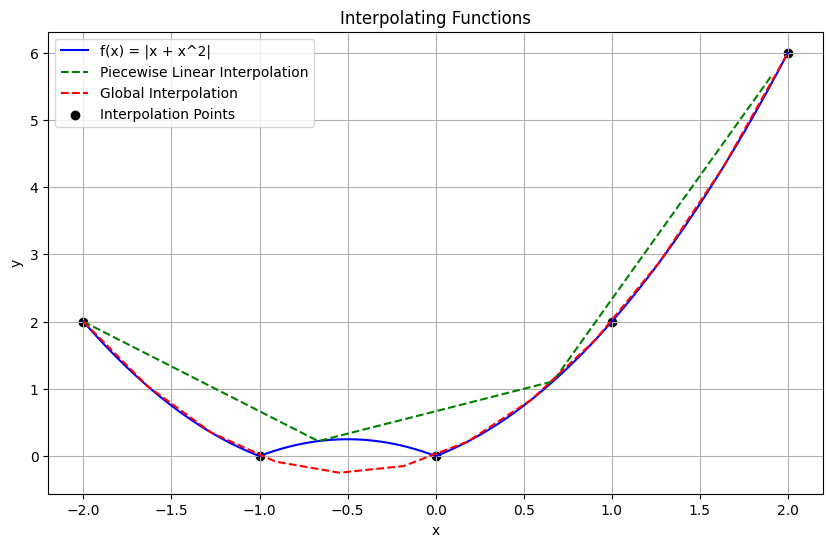

In [35]:

plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)

# Строим график исходной функции f(x)
x_original = np.linspace(a, b, 1000)
y_original = f(x_original)
ax.plot(x_original, y_original, label='f(x) = |x + x^2|', color='blue')

# Строим график кусочно-линейной интерполяции
ax.plot(interpolated_x, interpolated_y, label='Piecewise Linear Interpolation', linestyle='--', color='green')

# Строим график глобальной интерполяции
ax.plot(global_interpolated_x, global_interpolated_y, label='Global Interpolation', linestyle='--', color='red')

# Отмечаем точки, по которым осуществлялась интерполяция
ax.scatter(x_values, y_values, color='black', label='Interpolation Points')

# Добавляем легенду и подписи к осям
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interpolating Functions')

# Показываем график
plt.grid(True)
plt.show()

In [36]:
# Шаг 4: Вычислить практическую величину погрешностей

# Вычисляем значения функции f(x) в 3*k точках
true_y_values = f(global_interpolated_x)

# Вычисляем практическую величину погрешностей для кусочно-линейной интерполяции в 3*k точках
delta_piecewise_linear = np.abs(global_interpolated_y - true_y_values)

# Вычисляем практическую величину погрешностей для глобальной интерполяции в 3*k точках
delta_global = np.abs(global_interpolated_y - true_y_values)

# Выводим результаты
print("Практическая величина погрешностей для кусочно-линейной интерполяции в 3*k точках:")
for i, delta in enumerate(delta_piecewise_linear):
    print(f"Точка {i}: Δ = {delta}")

print("\nПрактическая величина погрешностей для глобальной интерполяции в 3*k точках:")
for i, delta in enumerate(delta_global):
    print(f"Точка {i}: Δ = {delta}")


Практическая величина погрешностей для кусочно-линейной интерполяции в 3*k точках:
Точка 0: Δ = 0.0
Точка 1: Δ = 0.0
Точка 2: Δ = 0.0
Точка 3: Δ = 0.165289256198347
Точка 4: Δ = 0.4958677685950413
Точка 5: Δ = 0.29752066115702464
Точка 6: Δ = 5.551115123125783e-17
Точка 7: Δ = 0.0
Точка 8: Δ = 2.220446049250313e-16
Точка 9: Δ = 0.0
Точка 10: Δ = 0.0
Точка 11: Δ = 0.0

Практическая величина погрешностей для глобальной интерполяции в 3*k точках:
Точка 0: Δ = 0.0
Точка 1: Δ = 0.0
Точка 2: Δ = 0.0
Точка 3: Δ = 0.165289256198347
Точка 4: Δ = 0.4958677685950413
Точка 5: Δ = 0.29752066115702464
Точка 6: Δ = 5.551115123125783e-17
Точка 7: Δ = 0.0
Точка 8: Δ = 2.220446049250313e-16
Точка 9: Δ = 0.0
Точка 10: Δ = 0.0
Точка 11: Δ = 0.0


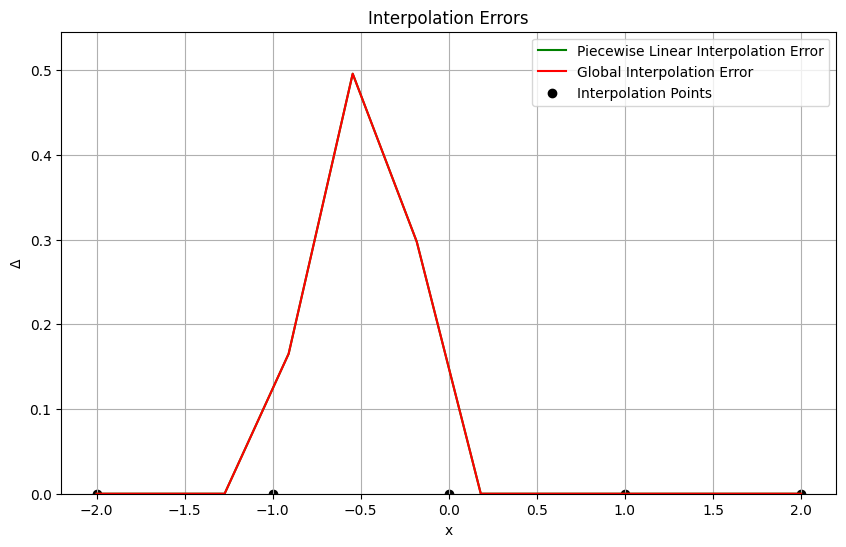

In [37]:
# Создаем фигуру и оси
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1)

# Строим графики погрешностей для кусочно-линейной и глобальной интерполяции
ax.plot(global_interpolated_x, delta_piecewise_linear, label='Piecewise Linear Interpolation Error', color='green')
ax.plot(global_interpolated_x, delta_global, label='Global Interpolation Error', color='red')

# Добавляем отметки точек, по которым осуществлялась интерполяция
ax.scatter(x_values, np.zeros_like(x_values), color='black', label='Interpolation Points')

# Добавляем легенду и подписи к осям
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('Δ')
ax.set_title('Interpolation Errors')

# Устанавливаем пределы по оси y
ax.set_ylim(0, max(max(delta_piecewise_linear), max(delta_global)) * 1.1)

# Показываем график
plt.grid(True)
plt.show()



# Задача 6.8.2

In [38]:
# Шаг 0: Ввод данных

# Отрезок
a = 1.5
b = 3.5

# функция
def f(x):
    return np.exp(x) * np.sin(5 * x)

In [39]:
# Шаг 1: Составить программу-функцию построения интерполяционного многочлена при произвольном распределении узлов

def lagrange_interpolation(x, nodes, values):
    """
    Вычисляет интерполяционное значение многочлена Лагранжа в точке x.

    Параметры:
    x : float
        Точка, в которой нужно вычислить значение интерполяции.
    nodes : numpy.ndarray
        Массив узлов интерполяции.
    values : numpy.ndarray
        Массив значений функции в узлах интерполяции.

    Возвращает:
    float
        Значение интерполяционного многочлена Лагранжа в точке x.
    """
    n = len(nodes)
    result = 0.0
    for j in range(n):
        term = values[j]
        for k in range(n):
            if k != j:
                term *= (x - nodes[k]) / (nodes[j] - nodes[k])
        result += term
    return result

def arbitrary_interpolation(x, nodes, values):
    """
    Строит интерполяционный многочлен Лагранжа для произвольного распределения узлов.

    Параметры:
    x : numpy.ndarray
        Массив точек, в которых нужно вычислить значения интерполяции.
    nodes : numpy.ndarray
        Массив узлов интерполяции.
    values : numpy.ndarray
        Массив значений функции в узлах интерполяции.

    Возвращает:
    numpy.ndarray
        Массив значений интерполяционного многочлена Лагранжа в точках x.
    """
    return np.array([lagrange_interpolation(xi, nodes, values) for xi in x])

In [40]:
# Пример использования - ТЕСТ
k = 4  # количество узлов интерполяции
nodes = np.linspace(a, b, k)  # равномерное распределение узлов
values = f(nodes)
x_values = np.linspace(a, b, 1000)
interp_values = arbitrary_interpolation(x_values, nodes, values)

In [44]:
# Шаг 2:
'''
вычислить приближенные значения функции f(x)в 3k точках исходного
отрезка [a, b] по k узлам интерполяции, распределенным равномерно на отрезке
'''
k = 4  # количество узлов интерполяции
num_points = 3 * k  # количество точек для вычисления приближенных значений

# Генерируем равномерно распределенные узлы интерполяции
nodes_uniform = np.linspace(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_uniform = f(nodes_uniform)

# Генерируем точки для вычисления приближенных значений
x_values = np.linspace(a, b, num_points)

# Вычисляем приближенные значения функции в точках x_values
interp_values_uniform = arbitrary_interpolation(x_values, nodes_uniform, values_uniform)

# Выводим результаты
for i, x in enumerate(x_values):
    print(f"f({x:.4f}) ≈ {interp_values_uniform[i]:.6f}")


f(1.5000) ≈ 4.203824
f(1.6818) ≈ -9.574754
f(1.8636) ≈ -14.364024
f(2.0455) ≈ -12.463136
f(2.2273) ≈ -6.171239
f(2.4091) ≈ 2.212516
f(2.5909) ≈ 10.388981
f(2.7727) ≈ 16.059005
f(2.9545) ≈ 16.923439
f(3.1364) ≈ 10.683134
f(3.3182) ≈ -4.961062
f(3.5000) ≈ -32.308296


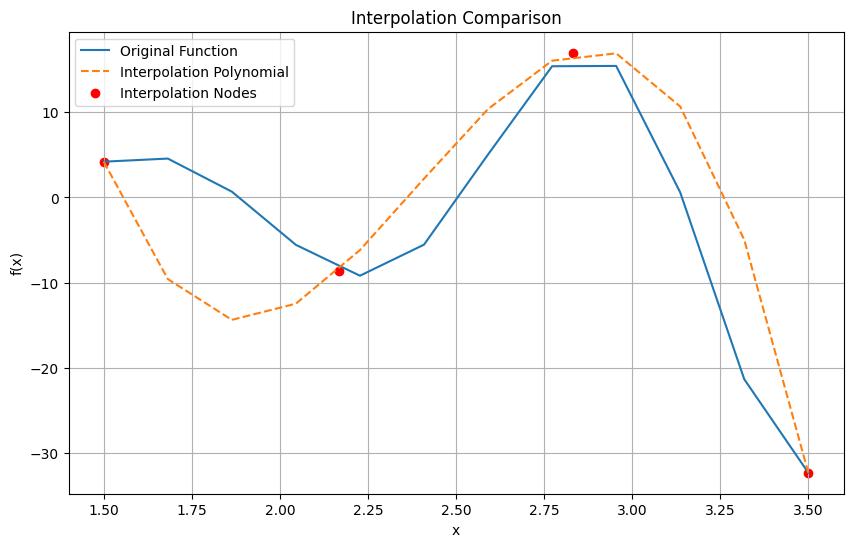

In [45]:
# Генерируем равномерно распределенные узлы интерполяции
nodes_uniform = np.linspace(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_uniform = f(nodes_uniform)

# Генерируем точки для вычисления приближенных значений
x_values = np.linspace(a, b, num_points)

# Вычисляем приближенные значения функции в точках x_values
interp_values_uniform = arbitrary_interpolation(x_values, nodes_uniform, values_uniform)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), label='Original Function')
plt.plot(x_values, interp_values_uniform, label='Interpolation Polynomial', linestyle='--')
plt.scatter(nodes_uniform, values_uniform, color='red', label='Interpolation Nodes')
plt.title('Interpolation Comparison')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

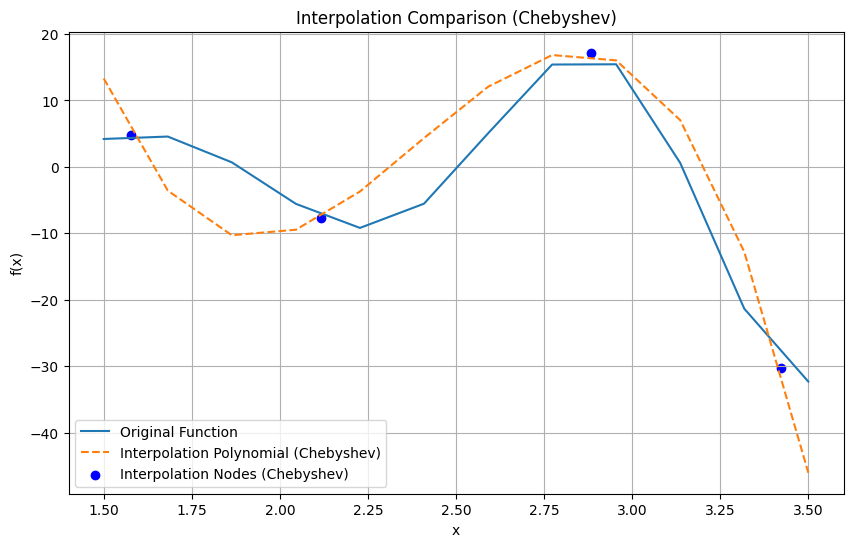

In [47]:

# чебышевское распределение
def chebyshev_nodes(a, b, n):
    k = np.arange(1, n + 1)
    return 0.5 * (a + b) + 0.5 * (b - a) * np.cos((2 * k - 1) * np.pi / (2 * n))

# Генерируем узлы интерполяции с чебышевским распределением
nodes_chebyshev = chebyshev_nodes(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_chebyshev = f(nodes_chebyshev)

# Вычисляем приближенные значения функции в точках x_values
interp_values_chebyshev = arbitrary_interpolation(x_values, nodes_chebyshev, values_chebyshev)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), label='Original Function')
plt.plot(x_values, interp_values_chebyshev, label='Interpolation Polynomial (Chebyshev)', linestyle='--')
plt.scatter(nodes_chebyshev, values_chebyshev, color='blue', label='Interpolation Nodes (Chebyshev)')
plt.title('Interpolation Comparison (Chebyshev)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


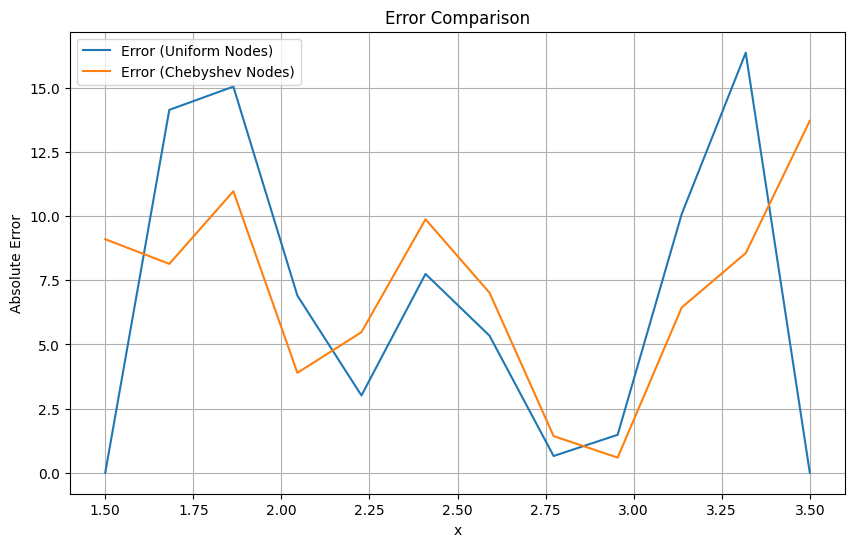

In [48]:
# Шаг 4: Сравнить качество приближения f(x) при разном распределении узлов
# Вычисляем значения функции в точках x_values
true_values = f(x_values)

# Вычисляем разницу между приближенными значениями и исходными значениями функции
error_uniform = np.abs(interp_values_uniform - true_values)
error_chebyshev = np.abs(interp_values_chebyshev - true_values)

# Визуализируем разницу на графике
plt.figure(figsize=(10, 6))
plt.plot(x_values, error_uniform, label='Error (Uniform Nodes)')
plt.plot(x_values, error_chebyshev, label='Error (Chebyshev Nodes)')
plt.title('Error Comparison')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.show()


In [49]:
# Шаг 5: Всё проделать (2 - 4 пункты) для 2 * k точек
# Шаг 2:
'''
вычислить приближенные значения функции f(x)в 2k точках исходного
отрезка [a, b] по k узлам интерполяции, распределенным равномерно на отрезке
'''
k = 4  # количество узлов интерполяции
num_points = 2 * k  # количество точек для вычисления приближенных значений

# Генерируем равномерно распределенные узлы интерполяции
nodes_uniform = np.linspace(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_uniform = f(nodes_uniform)

# Генерируем точки для вычисления приближенных значений
x_values = np.linspace(a, b, num_points)

# Вычисляем приближенные значения функции в точках x_values
interp_values_uniform = arbitrary_interpolation(x_values, nodes_uniform, values_uniform)

# Выводим результаты
for i, x in enumerate(x_values):
    print(f"f({x:.4f}) ≈ {interp_values_uniform[i]:.6f}")


f(1.5000) ≈ 4.203824
f(1.7857) ≈ -13.264744
f(2.0714) ≈ -11.779507
f(2.3571) ≈ -0.262236
f(2.6429) ≈ 12.365293
f(2.9286) ≈ 17.181308
f(3.2143) ≈ 5.264036
f(3.5000) ≈ -32.308296


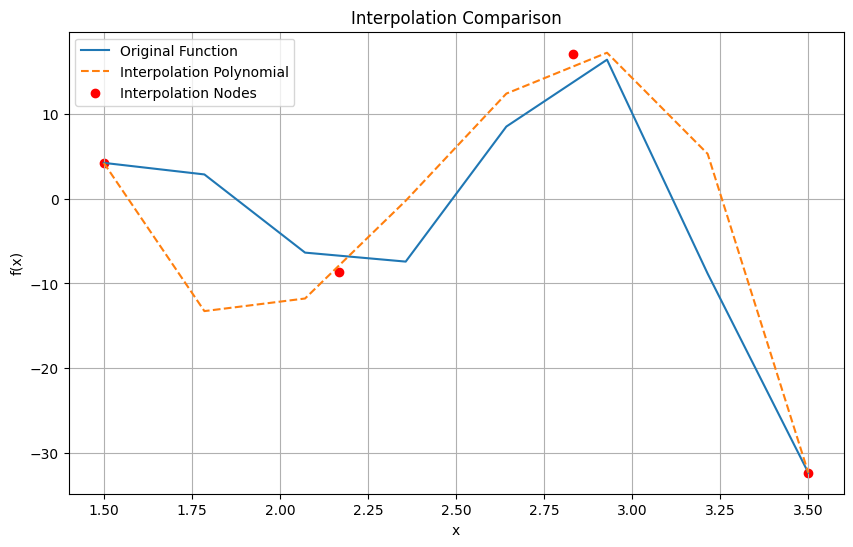

In [50]:
# Генерируем равномерно распределенные узлы интерполяции
nodes_uniform = np.linspace(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_uniform = f(nodes_uniform)

# Генерируем точки для вычисления приближенных значений
x_values = np.linspace(a, b, num_points)

# Вычисляем приближенные значения функции в точках x_values
interp_values_uniform = arbitrary_interpolation(x_values, nodes_uniform, values_uniform)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), label='Original Function')
plt.plot(x_values, interp_values_uniform, label='Interpolation Polynomial', linestyle='--')
plt.scatter(nodes_uniform, values_uniform, color='red', label='Interpolation Nodes')
plt.title('Interpolation Comparison')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

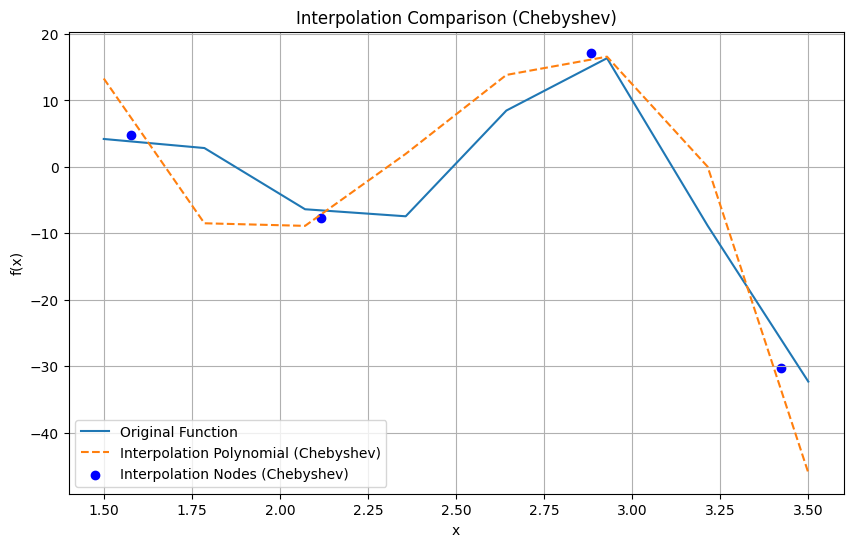

In [51]:


# Генерируем узлы интерполяции с чебышевским распределением
nodes_chebyshev = chebyshev_nodes(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_chebyshev = f(nodes_chebyshev)

# Вычисляем приближенные значения функции в точках x_values
interp_values_chebyshev = arbitrary_interpolation(x_values, nodes_chebyshev, values_chebyshev)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x_values, f(x_values), label='Original Function')
plt.plot(x_values, interp_values_chebyshev, label='Interpolation Polynomial (Chebyshev)', linestyle='--')
plt.scatter(nodes_chebyshev, values_chebyshev, color='blue', label='Interpolation Nodes (Chebyshev)')
plt.title('Interpolation Comparison (Chebyshev)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


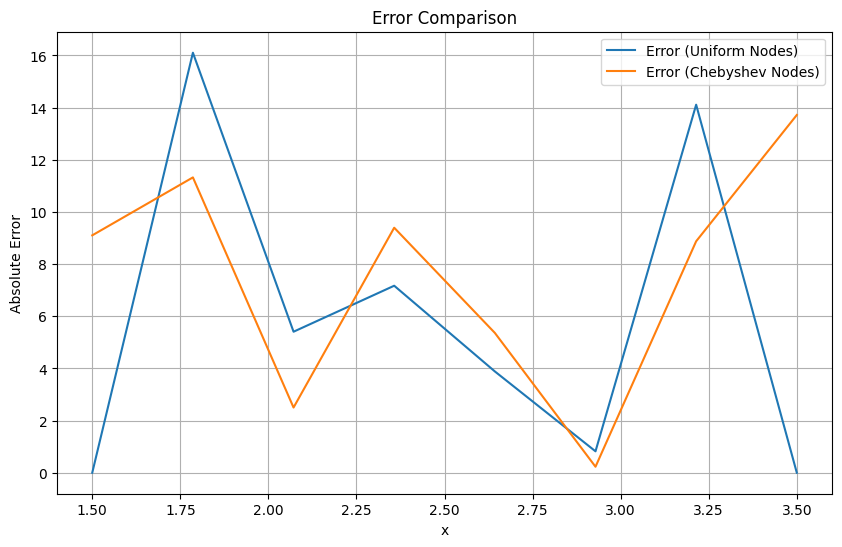

In [52]:
# Шаг 4: Сравнить качество приближения f(x) при разном распределении узлов
# Вычисляем значения функции в точках x_values
true_values = f(x_values)

# Вычисляем разницу между приближенными значениями и исходными значениями функции
error_uniform = np.abs(interp_values_uniform - true_values)
error_chebyshev = np.abs(interp_values_chebyshev - true_values)

# Визуализируем разницу на графике
plt.figure(figsize=(10, 6))
plt.plot(x_values, error_uniform, label='Error (Uniform Nodes)')
plt.plot(x_values, error_chebyshev, label='Error (Chebyshev Nodes)')
plt.title('Error Comparison')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

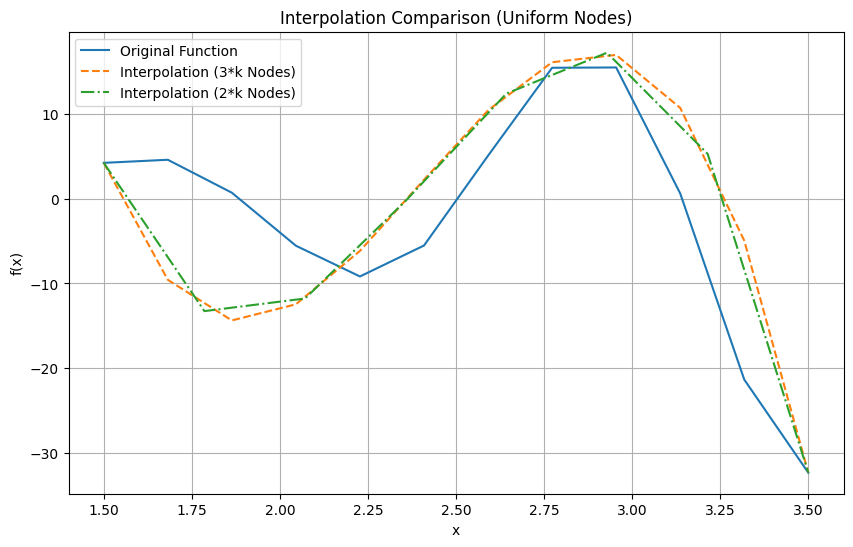

In [53]:
# Шаг 6: сравнить между 2 * k и 3 * k узлов
# Первый случай: 3 * k узлов
k = 4  # количество узлов интерполяции
num_points = 3 * k  # количество точек для вычисления приближенных значений

# Генерируем равномерно распределенные узлы интерполяции
nodes_uniform_3k = np.linspace(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_uniform_3k = f(nodes_uniform_3k)

# Генерируем точки для вычисления приближенных значений
x_values_3k = np.linspace(a, b, num_points)

# Вычисляем приближенные значения функции в точках x_values
interp_values_uniform_3k = arbitrary_interpolation(x_values_3k, nodes_uniform_3k, values_uniform_3k)

# Второй случай: 2 * k узлов
num_points = 2 * k  # количество точек для вычисления приближенных значений

# Генерируем равномерно распределенные узлы интерполяции
nodes_uniform_2k = np.linspace(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_uniform_2k = f(nodes_uniform_2k)

# Генерируем точки для вычисления приближенных значений
x_values_2k = np.linspace(a, b, num_points)

# Вычисляем приближенные значения функции в точках x_values
interp_values_uniform_2k = arbitrary_interpolation(x_values_2k, nodes_uniform_2k, values_uniform_2k)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x_values_3k, f(x_values_3k), label='Original Function')
plt.plot(x_values_3k, interp_values_uniform_3k, label='Interpolation (3*k Nodes)', linestyle='--')
plt.plot(x_values_2k, interp_values_uniform_2k, label='Interpolation (2*k Nodes)', linestyle='-.')
plt.title('Interpolation Comparison (Uniform Nodes)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


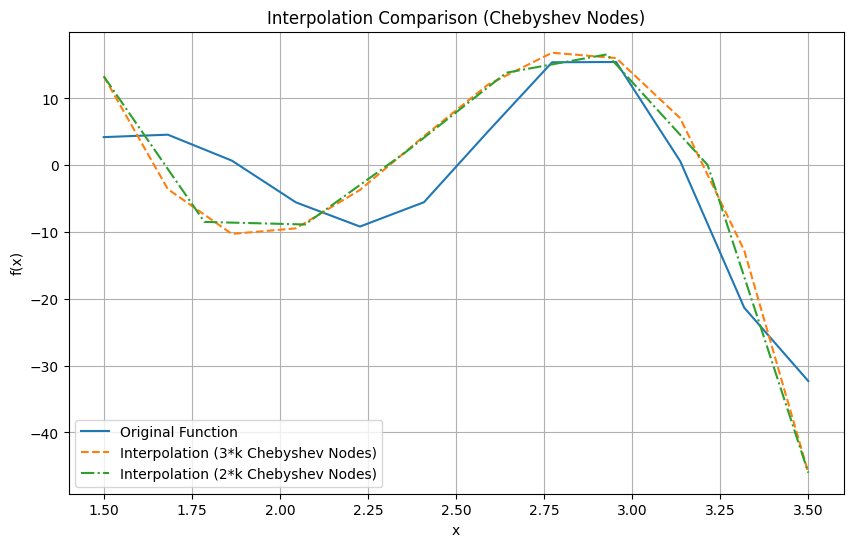

In [55]:
# Первый случай: 3 * k узлов
k = 4  # количество узлов интерполяции
num_points = 3 * k  # количество точек для вычисления приближенных значений

# Генерируем узлы интерполяции с чебышевским распределением
nodes_chebyshev_3k = chebyshev_nodes(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_chebyshev_3k = f(nodes_chebyshev_3k)

# Вычисляем приближенные значения функции в точках x_values
interp_values_chebyshev_3k = arbitrary_interpolation(x_values_3k, nodes_chebyshev_3k, values_chebyshev_3k)

# Второй случай: 2 * k узлов
num_points = 2 * k  # количество точек для вычисления приближенных значений

# Генерируем узлы интерполяции с чебышевским распределением
nodes_chebyshev_2k = chebyshev_nodes(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_chebyshev_2k = f(nodes_chebyshev_2k)

# Вычисляем приближенные значения функции в точках x_values
interp_values_chebyshev_2k = arbitrary_interpolation(x_values_2k, nodes_chebyshev_2k, values_chebyshev_2k)

# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x_values_3k, f(x_values_3k), label='Original Function')
plt.plot(x_values_3k, interp_values_chebyshev_3k, label='Interpolation (3*k Chebyshev Nodes)', linestyle='--')
plt.plot(x_values_2k, interp_values_chebyshev_2k, label='Interpolation (2*k Chebyshev Nodes)', linestyle='-.')
plt.title('Interpolation Comparison (Chebyshev Nodes)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()



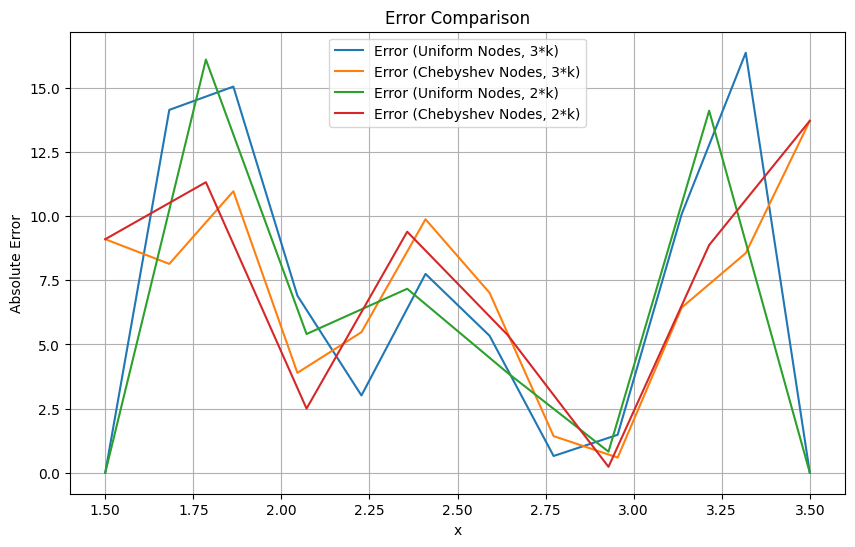

In [56]:
# Первый случай: 3 * k узлов
k = 4  # количество узлов интерполяции
num_points = 3 * k  # количество точек для вычисления приближенных значений

# Генерируем точки для вычисления приближенных значений
x_values_3k = np.linspace(a, b, num_points)

# Вычисляем значения функции в точках x_values
true_values = f(x_values_3k)

# Генерируем равномерно распределенные узлы интерполяции
nodes_uniform_3k = np.linspace(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_uniform_3k = f(nodes_uniform_3k)

# Вычисляем приближенные значения функции в точках x_values
interp_values_uniform_3k = arbitrary_interpolation(x_values_3k, nodes_uniform_3k, values_uniform_3k)

# Генерируем узлы интерполяции с чебышевским распределением
nodes_chebyshev_3k = chebyshev_nodes(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_chebyshev_3k = f(nodes_chebyshev_3k)

# Вычисляем приближенные значения функции в точках x_values
interp_values_chebyshev_3k = arbitrary_interpolation(x_values_3k, nodes_chebyshev_3k, values_chebyshev_3k)

# Вычисляем абсолютную ошибку для равномерного распределения узлов
error_uniform_3k = np.abs(interp_values_uniform_3k - true_values)

# Вычисляем абсолютную ошибку для чебышевского распределения узлов
error_chebyshev_3k = np.abs(interp_values_chebyshev_3k - true_values)


# Второй случай: 2 * k узлов
num_points = 2 * k  # количество точек для вычисления приближенных значений

# Генерируем точки для вычисления приближенных значений
x_values_2k = np.linspace(a, b, num_points)

# Вычисляем значения функции в точках x_values
true_values = f(x_values_2k)

# Генерируем равномерно распределенные узлы интерполяции
nodes_uniform_2k = np.linspace(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_uniform_2k = f(nodes_uniform_2k)

# Вычисляем приближенные значения функции в точках x_values
interp_values_uniform_2k = arbitrary_interpolation(x_values_2k, nodes_uniform_2k, values_uniform_2k)

# Генерируем узлы интерполяции с чебышевским распределением
nodes_chebyshev_2k = chebyshev_nodes(a, b, k)

# Вычисляем значения функции в узлах интерполяции
values_chebyshev_2k = f(nodes_chebyshev_2k)

# Вычисляем приближенные значения функции в точках x_values
interp_values_chebyshev_2k = arbitrary_interpolation(x_values_2k, nodes_chebyshev_2k, values_chebyshev_2k)

# Вычисляем абсолютную ошибку для равномерного распределения узлов
error_uniform_2k = np.abs(interp_values_uniform_2k - true_values)

# Вычисляем абсолютную ошибку для чебышевского распределения узлов
error_chebyshev_2k = np.abs(interp_values_chebyshev_2k - true_values)


# Строим графики
plt.figure(figsize=(10, 6))
plt.plot(x_values_3k, error_uniform_3k, label='Error (Uniform Nodes, 3*k)')
plt.plot(x_values_3k, error_chebyshev_3k, label='Error (Chebyshev Nodes, 3*k)')
plt.plot(x_values_2k, error_uniform_2k, label='Error (Uniform Nodes, 2*k)')
plt.plot(x_values_2k, error_chebyshev_2k, label='Error (Chebyshev Nodes, 2*k)')
plt.title('Error Comparison')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend()
plt.grid(True)
plt.show()
